# Etapa 1: Análise Descritiva

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("MKT.csv")

print(df.head())
print(df.info())
print(df.describe())

   youtube  facebook  newspaper  sales
0    84.72     19.20      48.96  12.60
1   351.48     33.96      51.84  25.68
2   135.48     20.88      46.32  14.28
3   116.64      1.80      36.00  11.52
4   318.72     24.00       0.36  20.88
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 171 entries, 0 to 170
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   youtube    171 non-null    float64
 1   facebook   171 non-null    float64
 2   newspaper  171 non-null    float64
 3   sales      171 non-null    float64
dtypes: float64(4)
memory usage: 5.5 KB
None
          youtube    facebook   newspaper       sales
count  171.000000  171.000000  171.000000  171.000000
mean   178.021053   27.671579   35.240000   16.922807
std    102.449597   17.913532   24.902918    6.314608
min      0.840000    0.000000    0.360000    1.920000
25%     91.080000   11.700000   13.740000   12.540000
50%    179.760000   26.760000   31.080000   15.480000

# Etapa 2: Análise Exploratória

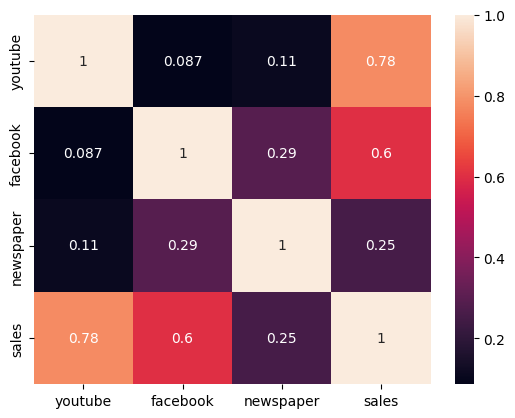

In [8]:
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True)
plt.show()


# Etapa 3: Modelagem

In [23]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

X = df[['youtube', 'facebook', 'newspaper']]
y = df['sales']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression().fit(X_train, y_train)
print(f"Coeficientes: {model.coef_}")
print(f"Intercepto: {model.intercept_}")

Coeficientes: [ 4.41858407e-02  1.94481975e-01 -4.88341093e-05]
Intercepto: 3.7030498901645927


# Etapa 4: Calculando a Predição

In [17]:
from sklearn.metrics import r2_score

y_pred = model.predict(X_test)
r2 = r2_score(y_test, y_pred)
print(f"R²: {r2}")

R²: 0.872863085701216


In [24]:
new_investment = pd.DataFrame([[1000, 500, 200]], columns=['youtube', 'facebook', 'newspaper'])
predicted_sales = model.predict(new_investment)
print(f"Vendas previstas: {predicted_sales[0]}")

Vendas previstas: 145.12011141925444
